# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-whitegrid'])

In [3]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_diabetes, load_breast_cancer, load_iris, load_wine
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [4]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))


학습 데이터 점수: 0.4798035894607433
평가 데이터 점수: 0.23866124600340766


### SVM을 사용한 분류 모델 (SVC)

In [5]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

In [6]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print("Linear SVR 학습 데이터 점수: {}". format(linear_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수: {}". format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print("Polynomial SVR 학습 데이터 점수: {}". format(linear_svr.score(X_train, y_train)))
print("Polynomial SVR 평가 데이터 점수: {}". format(linear_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print("RBF SVR 학습 데이터 점수: {}". format(linear_svr.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수: {}". format(linear_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 점수: -0.15023420504457885
Linear SVR 평가 데이터 점수: -2.0297055935353847
Polynomial SVR 학습 데이터 점수: -0.15023420504457885
Polynomial SVR 평가 데이터 점수: -2.0297055935353847
RBF SVR 학습 데이터 점수: -0.15023420504457885
RBF SVR 평가 데이터 점수: -2.0297055935353847


In [7]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print("Linear SVC 학습 데이터 점수: {}". format(linear_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수: {}". format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print("Polynomial SVC 학습 데이터 점수: {}". format(linear_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수: {}". format(linear_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print("RBF SVC 학습 데이터 점수: {}". format(linear_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수: {}". format(linear_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 점수: 0.960093896713615
Linear SVC 평가 데이터 점수: 0.986013986013986
Polynomial SVC 학습 데이터 점수: 0.960093896713615
Polynomial SVC 평가 데이터 점수: 0.986013986013986
RBF SVC 학습 데이터 점수: 0.960093896713615
RBF SVC 평가 데이터 점수: 0.986013986013986


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [8]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [9]:
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print("kernel=poly, degree={}, C={}, gamma={}".format(2, 0.1, 'auto'))
print("Polynomial SVC 학습 데이터 점수: {}". format(linear_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수: {}". format(linear_svc.score(X_test, y_test)))


kernel=poly, degree=2, C=0.1, gamma=auto
Polynomial SVC 학습 데이터 점수: 0.960093896713615
Polynomial SVC 평가 데이터 점수: 0.986013986013986


In [10]:
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
rbf_svc.fit(X_train, y_train)

print("kernel=poly,C={}, gamma={}".format(2.0, 'scale'))
print("RBF SVC 학습 데이터 점수: {}". format(linear_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수: {}". format(linear_svc.score(X_test, y_test)))

kernel=poly,C=2.0, gamma=scale
RBF SVC 학습 데이터 점수: 0.960093896713615
RBF SVC 평가 데이터 점수: 0.986013986013986


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [11]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [12]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test,y_test)))

SVC 학습 데이터 점수: 0.9014084507042254
SVC 평가 데이터 점수: 0.9230769230769231


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test,y_test)))

SVC 학습 데이터 점수: 0.9835680751173709
SVC 평가 데이터 점수: 0.986013986013986


In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9812206572769953
SVC 평가 데이터 점수: 0.986013986013986


## Linear SVR

###  아이리스(iris)

In [17]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [20]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9243802757763018
평가 데이터 점수: 0.9495734136797627


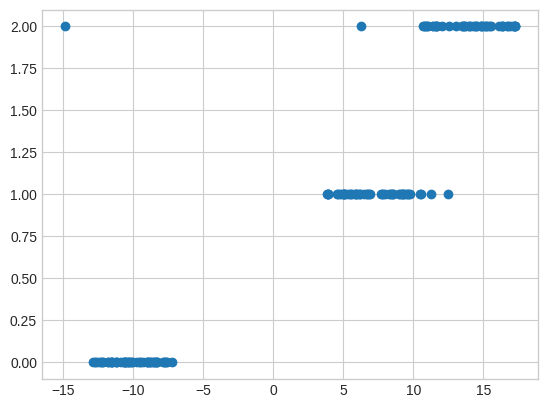

In [21]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

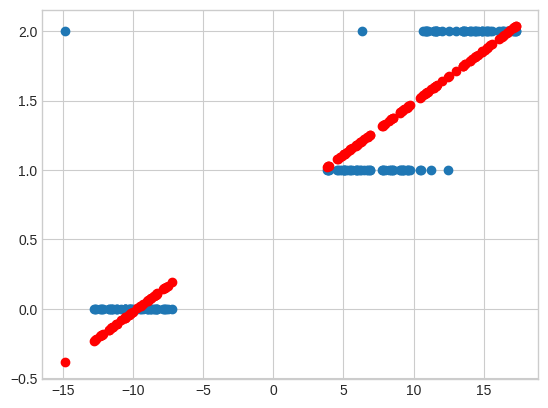

In [22]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [23]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.0s finished


{'fit_time': array([0.00550413, 0.00548935, 0.00603056, 0.00490212, 0.00383139]),
 'score_time': array([0.00148749, 0.00138283, 0.00136733, 0.00153923, 0.00112224]),
 'test_score': array([0.        , 0.84602366, 0.        , 0.73206827, 0.        ])}

In [29]:
pip = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma' :['scale','auto'],
               'model__C': [1.0,0.1,0.01],
               'model__epsilon': [1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator=pip,  # Changed 'pipe' to 'pip'
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [30]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=0.01, kernel='linear'))])

### 당뇨병

In [34]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [39]:
print("학습 데이터 점수 {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 {}".format(model.score(X_test, y_test)))

학습 데이터 점수 0.5028231012667554
평가 데이터 점수 0.46038603476427675


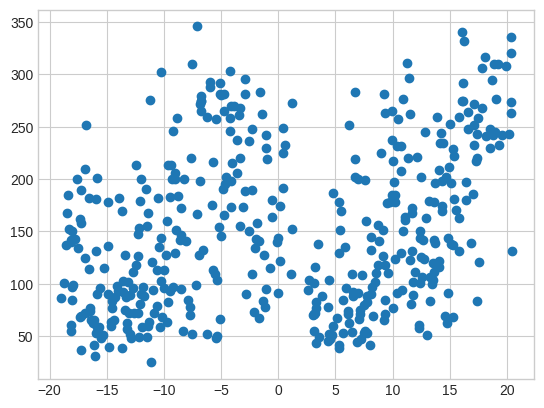

In [40]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

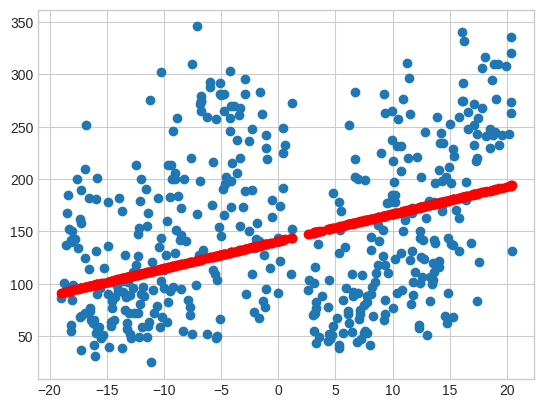

In [41]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [42]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.6s finished


{'fit_time': array([0.01768732, 0.01239753, 0.02068782, 0.01633239, 0.02546906]),
 'score_time': array([0.00224209, 0.00228095, 0.00427556, 0.01148653, 0.00212383]),
 'test_score': array([0.43039087, 0.51655019, 0.48275821, 0.4224617 , 0.53077081])}

In [43]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma' :['scale','auto'],
               'model__C':[1.0,0.1,0.01],
               'model__epsilon':[1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [44]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

### 당뇨병

In [45]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [48]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.16617743995468393
평가 데이터 점수 : 0.13608460195545646


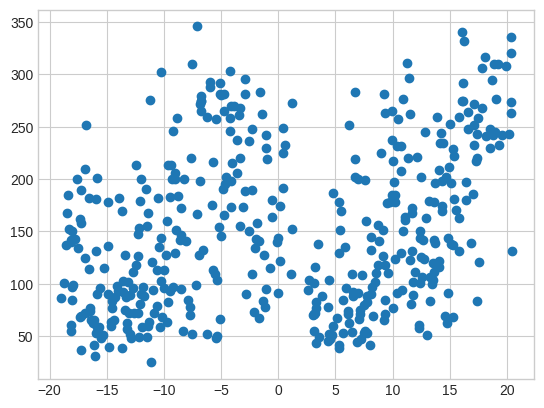

In [49]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y);

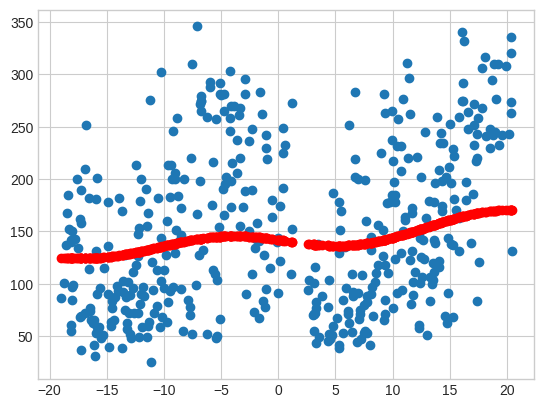

In [50]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [51]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.0s finished


{'fit_time': array([0.0132637 , 0.0121851 , 0.02378631, 0.02807951, 0.02034187]),
 'score_time': array([0.00397086, 0.00377774, 0.01409864, 0.00340366, 0.0100069 ]),
 'test_score': array([0.14580768, 0.12539699, 0.18163843, 0.12222929, 0.15792104])}

In [52]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel':['rbf','polynomial','sigmoid']}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [53]:
gs.best_estimator_ #sigmoid로 변경해서 다시 테스트

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [54]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma':['scale','auto'],
               'model__C':[1.0,0.1,0.01],
               'model__epsilon':[1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [55]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [56]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [57]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.35011432624117145
평가 데이터 점수: 0.3746267889251035


## Linear SVC

### 유방암

In [122]:
X, y =load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [125]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 :{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.989010989010989
평가 데이터 점수 :0.9824561403508771


In [126]:
#SVR과 다르게 SVC는 클래스 구분을 위한 시각화 추가

def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  return xx,yy

In [127]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [128]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

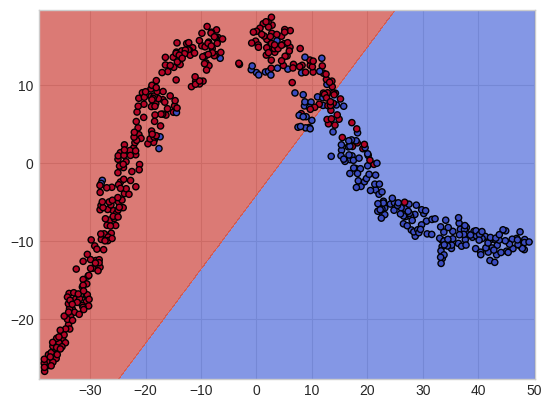

In [129]:
model.fit(X_comp,y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k');

In [130]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01858711, 0.0071919 , 0.00770831, 0.01519847, 0.00671148]),
 'score_time': array([0.00157571, 0.00137258, 0.00219202, 0.00128365, 0.00291491]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [131]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
               'model__C':[1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [132]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

### 와인

In [133]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [134]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [136]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 1.0
평가 데이터 점수: 0.9722222222222222


In [137]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

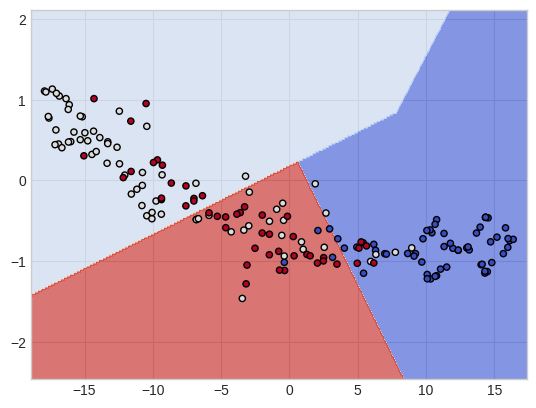

In [138]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [139]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00860858, 0.00383782, 0.01250339, 0.00323892, 0.01186299]),
 'score_time': array([0.00129604, 0.00531554, 0.00422859, 0.01250744, 0.0011766 ]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [140]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])
param_grid = [{'model__gamma':['scale','auto'],
               'model__C':[1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

## Kernel SVC

### 유방암

In [148]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [154]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [156]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9912087912087912
평가 데이터 점수: 0.9736842105263158


In [157]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

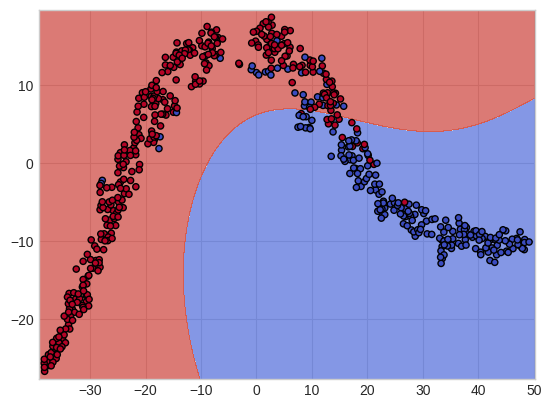

In [158]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [159]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    3.6s finished


{'fit_time': array([0.02319694, 0.01959658, 0.01340199, 0.02438116, 0.01399517]),
 'score_time': array([0.00264335, 0.00960755, 0.01131654, 0.01245022, 0.01915145]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [160]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma':['scale','auto'],
               'model__C':[1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True

)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [162]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

### 와인

In [171]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [172]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [174]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9722222222222222


In [175]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

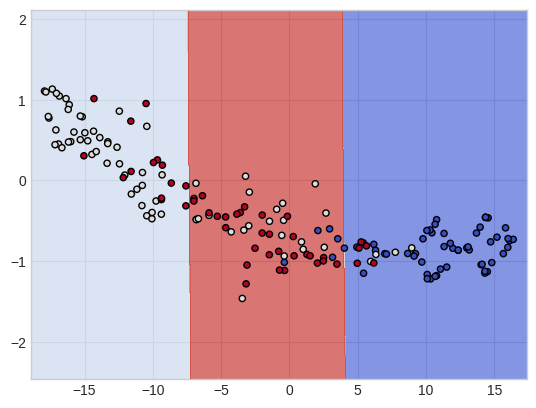

In [176]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [177]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True

)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.6s finished


{'fit_time': array([0.00369358, 0.00347781, 0.00671554, 0.00299692, 0.00278687]),
 'score_time': array([0.00136161, 0.00123715, 0.00541759, 0.0011909 , 0.00927615]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [179]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma':['scale','auto'],
               'model__C':[1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [180]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])